<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/analiza_sieciowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
#wig20tabela = pd.read_html('https://stooq.pl/t/?i=532')[1]
#wig20 = wig20tabela.drop(wig20tabela.columns[-1], axis=1).dropna()
#first_column = wig20.iloc[:, 0].tolist()
#print(first_column)

['ACP', 'ALE', 'ALR', 'CDR', 'CPS', 'DNP', 'JSW', 'KGH', 'KRU', 'KTY', 'LPP', 'MBK', 'OPL', 'PCO', 'PEO', 'PGE', 'PKN', 'PKO', 'PZU', 'SPL']


In [19]:
wig_banki = ['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO', 'PKO', 'SAN', 'SPL', 'UCG']
wig_20 = ['ACP', 'ALE', 'ALR', 'CDR', 'CPS', 'DNP', 'JSW', 'KGH', 'KRU', 'KTY', 'LPP', 'MBK', 'OPL', 'PCO', 'PEO', 'PGE', 'PKN', 'PKO', 'PZU', 'SPL']

In [18]:
#wig_upper = [ticker.upper() for ticker in wig_banki]
#print(wig_upper)

['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO', 'PKO', 'SAN', 'SPL', 'UCG']


In [20]:
urls = []
tickers = wig_banki + wig_20
for bank in tickers:
  url = f'https://stooq.pl/q/h/?s={bank}'
  urls.append(url)

In [21]:
urls

['https://stooq.pl/q/h/?s=ALR',
 'https://stooq.pl/q/h/?s=BHW',
 'https://stooq.pl/q/h/?s=BNP',
 'https://stooq.pl/q/h/?s=BOS',
 'https://stooq.pl/q/h/?s=GTN',
 'https://stooq.pl/q/h/?s=ING',
 'https://stooq.pl/q/h/?s=MBK',
 'https://stooq.pl/q/h/?s=MIL',
 'https://stooq.pl/q/h/?s=PEO',
 'https://stooq.pl/q/h/?s=PKO',
 'https://stooq.pl/q/h/?s=SAN',
 'https://stooq.pl/q/h/?s=SPL',
 'https://stooq.pl/q/h/?s=UCG',
 'https://stooq.pl/q/h/?s=ACP',
 'https://stooq.pl/q/h/?s=ALE',
 'https://stooq.pl/q/h/?s=ALR',
 'https://stooq.pl/q/h/?s=CDR',
 'https://stooq.pl/q/h/?s=CPS',
 'https://stooq.pl/q/h/?s=DNP',
 'https://stooq.pl/q/h/?s=JSW',
 'https://stooq.pl/q/h/?s=KGH',
 'https://stooq.pl/q/h/?s=KRU',
 'https://stooq.pl/q/h/?s=KTY',
 'https://stooq.pl/q/h/?s=LPP',
 'https://stooq.pl/q/h/?s=MBK',
 'https://stooq.pl/q/h/?s=OPL',
 'https://stooq.pl/q/h/?s=PCO',
 'https://stooq.pl/q/h/?s=PEO',
 'https://stooq.pl/q/h/?s=PGE',
 'https://stooq.pl/q/h/?s=PKN',
 'https://stooq.pl/q/h/?s=PKO',
 'https:

In [22]:
all_tables = []
for i, url in enumerate(urls):
  tables = pd.read_html(url)
  table = tables[1].dropna()
  ticker = tickers[i] #wig_banki
  table['company'] = ticker
  all_tables.append(table)

<ipython-input-22-8fb6f6580ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['company'] = ticker
<ipython-input-22-8fb6f6580ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['company'] = ticker
<ipython-input-22-8fb6f6580ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [23]:
combined_table=pd.concat(all_tables)

In [24]:
combined_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,company
5,1,PZU SA,31.91%,41658850.0,0.0,1.82 mld,31.91%,41658850.0,0.0,4 lis 2022,ALR
6,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,534 mln,9.34%,12196509.0,-198000.0,30 gru 2022,ALR
7,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,504 mln,8.83%,11526440.0,9607180.0,12 maj 2023,ALR
8,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,272 mln,4.76%,6209081.0,70943.0,30 gru 2022,ALR
9,5,OFE NNLife,3.45%,4502562.0,0.0,197 mln,3.45%,4502562.0,0.0,30 gru 2022,ALR
...,...,...,...,...,...,...,...,...,...,...,...
31,27,TFI Credit Agricole,0.02%,21845.0,-1464.0,7.51 mln,0.02%,21845.0,-1464.0,31 gru 2022,SPL
32,28,TFI Skarbiec SA,0.02%,21000.0,-3200.0,7.22 mln,0.02%,21000.0,-3200.0,30 cze 2022,SPL
33,29,TFI Rockbridge SA,0.01%,14850.0,-950.0,5.11 mln,0.01%,14850.0,-950.0,30 cze 2022,SPL
34,30,TFI BNP Paribas SA,0.01%,11690.0,3239.0,4.02 mln,0.01%,11690.0,3239.0,31 gru 2022,SPL


In [ ]:
combined_table.to_csv('combined_table.csv', index=False)

In [26]:
combined_table = combined_table.rename(columns={'Wartość rynkowa (PLN)': 'Value'})
# print(combined_table.columns)

combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')
combined_table['Value'] = combined_table['Value'].astype(int)

print(combined_table)

    Lp               Akcjonariusz Udział w kapitale  Liczba akcji  \
5    1                     PZU SA            31.91%    41658850.0   
6    2  OFE Nationale-Nederlanden             9.34%    12196509.0   
7    3         OFE Allianz Polska             8.83%    11526440.0   
8    4         OFE PKO BP Bankowy             4.76%     6209081.0   
9    5                 OFE NNLife             3.45%     4502562.0   
..  ..                        ...               ...           ...   
31  27        TFI Credit Agricole             0.02%       21845.0   
32  28            TFI Skarbiec SA             0.02%       21000.0   
33  29          TFI Rockbridge SA             0.01%       14850.0   
34  30         TFI BNP Paribas SA             0.01%       11690.0   
35  31         TFI Noble Funds SA             0.01%        9800.0   

    Ostatnia zmiana         Value Udział na WZA  Liczba głosów  \
5               0.0  182000000000        31.91%     41658850.0   
6         -198000.0     534000000      

<ipython-input-26-b755b8fe581e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')


In [27]:
G =nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', edge_attr=True)

In [28]:
edgelist = nx.to_edgelist(G)

In [29]:
colors = []
for node in G:
  if node in combined_table['company'].values:
    colors.append('red')
  else:
    colors.append('blue')

In [30]:
G.degree()

DegreeView({'PZU SA': 2, 'ALR': 33, 'OFE Nationale-Nederlanden': 26, 'OFE Allianz Polska': 23, 'OFE PKO BP Bankowy': 23, 'OFE NNLife': 22, 'OFE Aegon': 25, 'OFE Generali': 25, 'OFE UNIQA': 26, 'TFI NN Investment Partners SA': 24, 'TFI Aviva Investors Poland SA': 22, 'TFI Santander SA': 24, 'TFI PKO SA': 24, 'OFE Pocztylion Arka': 24, 'TFI Esaliens SA': 21, 'Norges Bank (Government of Norway)': 21, 'TFI Pekao SA': 23, 'TFI Allianz Polska SA': 17, 'TFI PZU SA': 24, 'TFI Skarbiec SA': 18, 'TFI Uniqa SA': 22, 'TFI Generali Investment SA': 22, 'TFI Millennium SA': 22, 'TFI Opera SA': 12, 'TFI Rockbridge SA': 18, 'TFI Quercus SA': 18, 'TFI BNP Paribas SA': 21, 'DFE PKO': 9, 'TFI AgioFunds SA': 6, 'TFI Ipopema SA': 16, 'TFI Investors SA': 22, 'TFI Noble Funds SA': 12, 'TFI Credit Agricole': 20, 'DFE Nationale-Nederlanden': 8, 'Citibank Overseas Investment Corporation': 1, 'BHW': 28, 'OFE Drugi Allianz': 16, 'OFE PZU Złota Jesień': 23, 'BNP Paribas SA': 1, 'BNP': 24, 'BNP Paribas Fortis SA/NV'

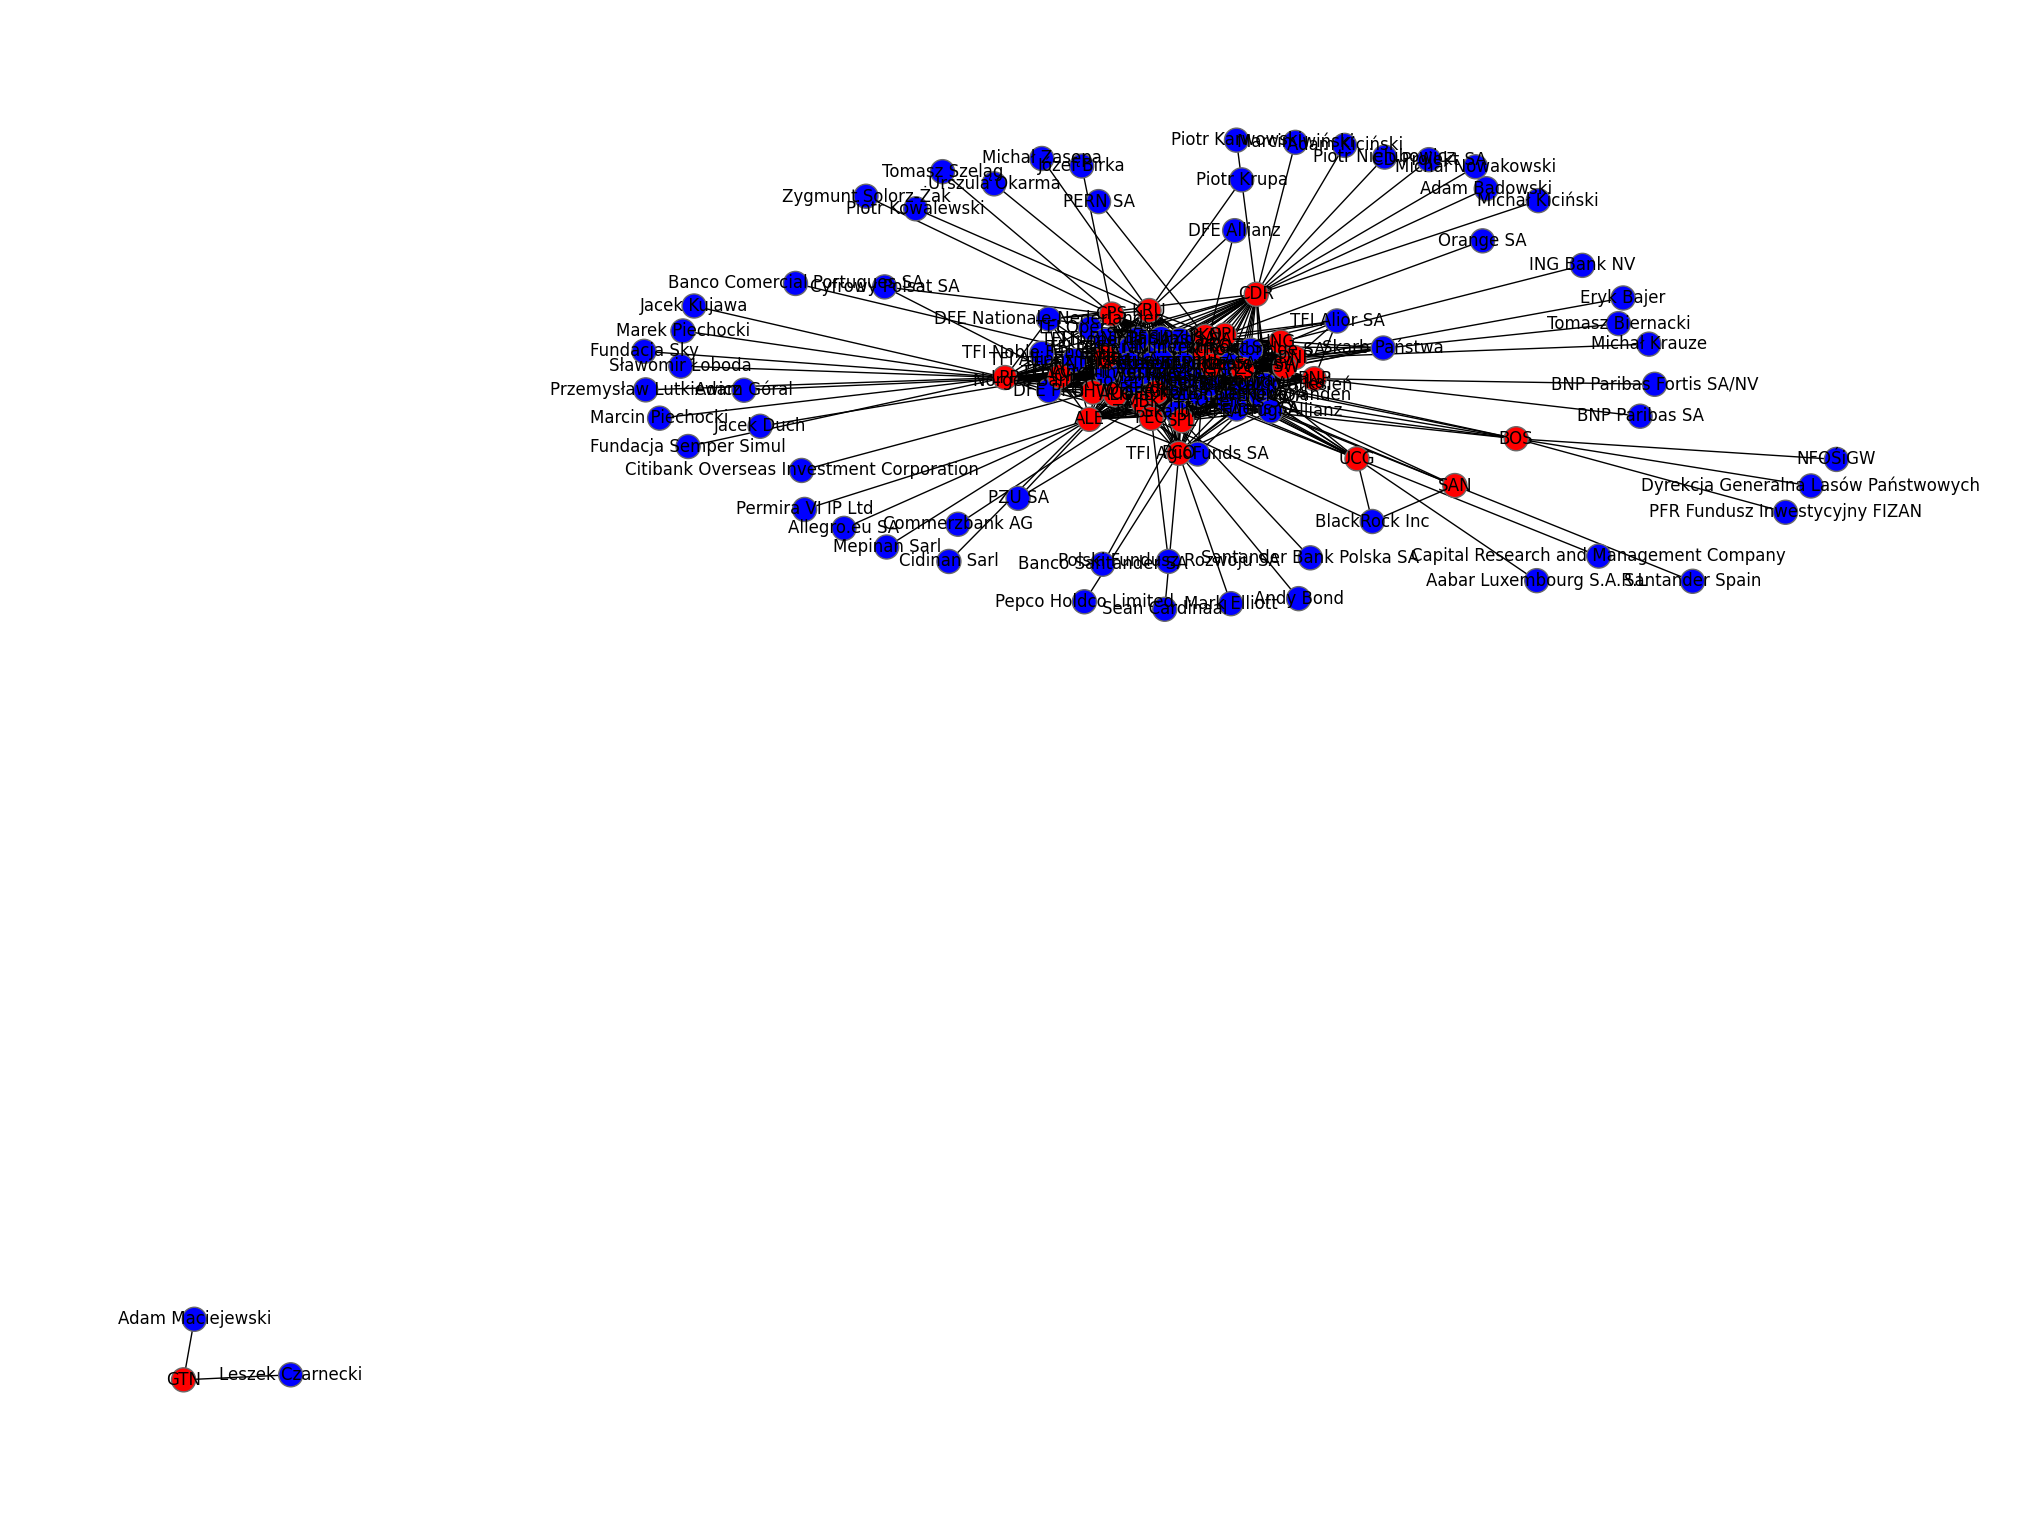

In [31]:
plt.figure(figsize=(20,15))
nx.draw(G, with_labels=True,
        node_color=colors)

ax = plt.gca()
ax.collections[0].set_edgecolor('#696969')

Empty DataFrame
Columns: [<html><head><meta http-equiv=content-type content=text/html;charset=utf-8><meta name=keywords content="wig_banki,  wig_banki,  komponenty,  spÃ³Åki skÅadowe,  skÅad,  konstrukcja indeksu"><meta name=description content="Komponenty indeksÃ³w gieÅdowych"><title>WIG_BANKI - WIG-Banki - Stooq</title><script>var $=function(s){return document.getElementById(s)};!function(n, e, o){function t(n, e){return typeof n===e}function s(){var n, e.1, o, s, a, f, l;for(var c in i)if(i.hasOwnProperty(c)){if(n=[], e=i[c], e.name&&(n.push(e.name.toLowerCase()), e.options&&e.options.aliases&&e.options.aliases.length))for(o=0;o<e.options.aliases.length;o++)n.push(e.options.aliases[o].toLowerCase());for(s=t(e.fn, function)?e.fn():e.fn, a=0;a<n.length;a++)f=n[a], l=f.split("."), 1===l.length?Modernizr[l[0]]=s:(!Modernizr[l[0]]||Modernizr[l[0]]instanceof Boolean||(Modernizr[l[0]]=new Boolean(Modernizr[l[0]])), Modernizr[l[0]][l[1]]=s), r.push((s?"":"no-")+l.join("-"))}}var i=[], a